# Dataset - Usuarios de Tarjetas de Crédito
Este dataset consiste en una recopilación de información de 10,000 clientes de un banco donde estos mencionan su edad, salario, estado civil, limite de crédito de su tarjeta y muchos atributos más que se analizarán en este estudio.
La informacíón de este dataset fue extraída de la siguiente página https://leaps.analyttica.com/.


### Contexto Comercial
El mercado de las tarjetas de crédito se ha expandido radicalmente en todo el mundo; con el aumento constante de usuarios, los bancos han estado trabajando en la forma de ofrecer a cada cliente la tarjeta de crédito perfecta para adaptarse a ellos en términos de variedad, beneficios y uso. 
##Objetivo de estudio
El objetivo de este proyecto es analizar, explorar e investigar diferentes atributos, patrones y conexiones entre las variables disponibles en los datos recogidos de  clientes, que pueden llevarnos a importantes conclusiones y recomendaciones de negocio para tomar decisiones basadas en datos, se destaca que podremos **observar que factores intervienen en la cancelación su tarjeta de los usuarios por distintas razones** lo cual resultaría interesante analizar como problemática de estudio.

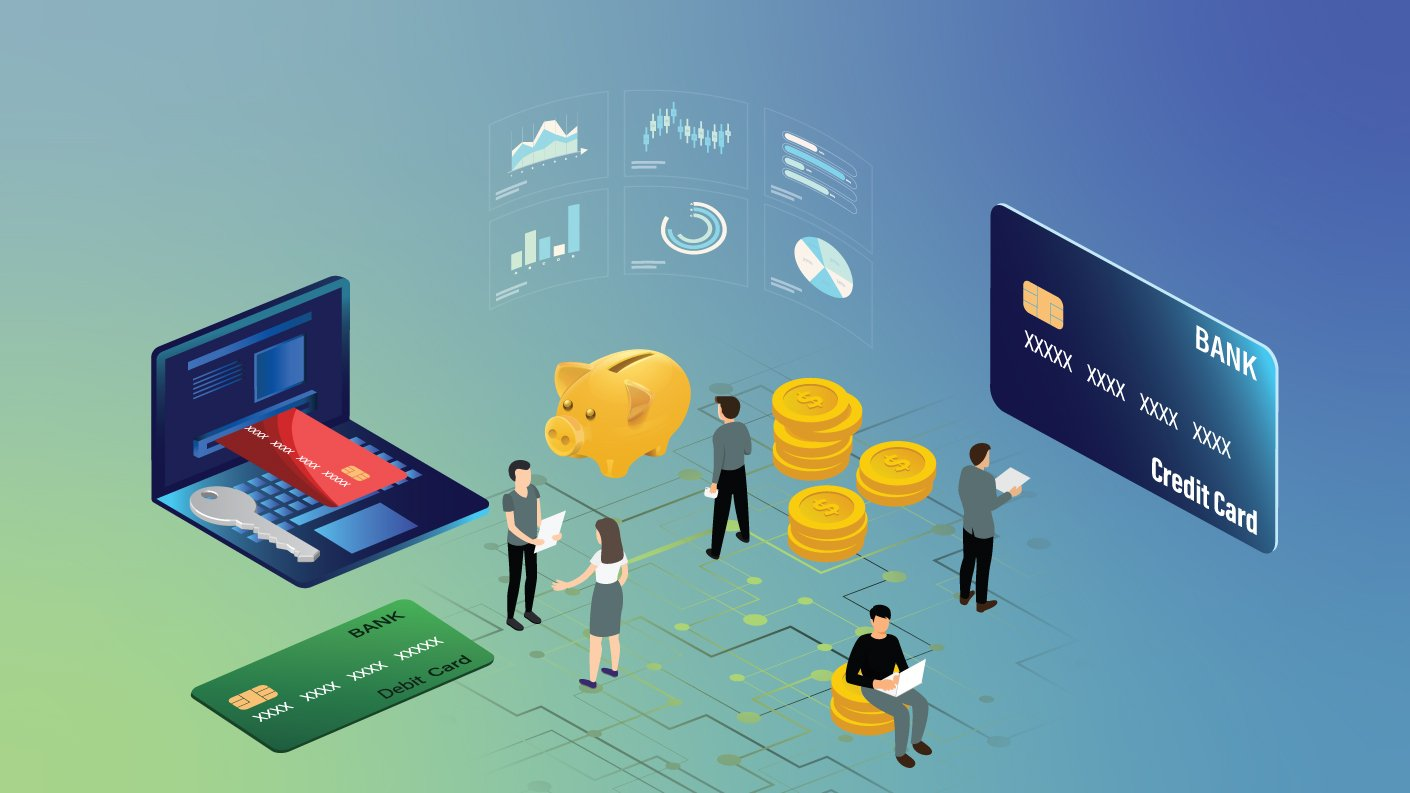



# Comencemos a explorar los diferentes atributos que tenemos para entender mejor el contexto del analítico del estudio.
Los datos recogidos constan de 17 columnas:
*   CLIENT_NUM 
-Attrition_Flag (Si la cuenta está activa o cancelada)
-Customer_Age
-Gender
-Dependent_count	 (# de individuos dependientes del cliente)
-Education_Level	
-Marital_Status
-Min_Income
-Card_Category  
-Months_on_book (Numero de meses siendo cliente del banco)
-Months_Inactive_12_mon
-Credit_Limit 
-Total_Revolving_Bal (Total balance revolvente)
-Total_Trans_Amt	
-Avg_Utilization_Ratio (Uso promedio tarjeta)



Ahora que hemos visto los atributos con los que podemos trabajar, podemos establecer nuestro enfoque en este estudio.

Comenzamos visualizando el dataset.

In [ ]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/Credit_Dataset.csv')
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
CLIENTNUM,768805383,818770008,713982108,769911858,709106358,713061558,810347208,818906208,710930508,719661558
Attrition_Flag,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer
Customer_Age,45,49,51,40,40,44,51,32,37,48
Gender,M,F,M,F,M,M,M,M,M,M
Dependent_count,3,5,3,4,3,2,4,0,3,2
Education_Level,High School,Graduate,Graduate,High School,Uneducated,Graduate,Unknown,High School,Uneducated,Graduate
Marital_Status,Married,Single,Married,Unknown,Married,Married,Married,Unknown,Single,Single
Income_Category,$60K - $80K,Less than $40K,$80K - $120K,Less than $40K,$60K - $80K,$40K - $60K,$120K +,$60K - $80K,$60K - $80K,$80K - $120K
Card_Category,Blue,Blue,Blue,Blue,Blue,Blue,Gold,Silver,Blue,Blue
Months_on_book,39,44,36,34,21,36,46,27,36,36


In [ ]:
df.shape

(10127, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLIENTNUM               10127 non-null  int64  
 1   Attrition_Flag          10127 non-null  object 
 2   Customer_Age            10127 non-null  int64  
 3   Gender                  10127 non-null  object 
 4   Dependent_count         10127 non-null  int64  
 5   Education_Level         10127 non-null  object 
 6   Marital_Status          10127 non-null  object 
 7   Income_Category         10127 non-null  object 
 8   Card_Category           10127 non-null  object 
 9   Months_on_book          10127 non-null  int64  
 10  Months_Inactive_12_mon  10127 non-null  int64  
 11  Contacts_Count_12_mon   10127 non-null  int64  
 12  Credit_Limit            10127 non-null  float64
 13  Total_Revolving_Bal     10127 non-null  int64  
 14  Total_Trans_Amt         10127 non-null

In [ ]:
df.isna().sum()

CLIENTNUM                 0
Attrition_Flag            0
Customer_Age              0
Gender                    0
Dependent_count           0
Education_Level           0
Marital_Status            0
Income_Category           0
Card_Category             0
Months_on_book            0
Months_Inactive_12_mon    0
Contacts_Count_12_mon     0
Credit_Limit              0
Total_Revolving_Bal       0
Total_Trans_Amt           0
Avg_Utilization_Ratio     0
dtype: int64

# Analicemos mejor a los usuarios a través de visualizaciones descriptivas

###Visualicemos la distribución de edades de los clientes 

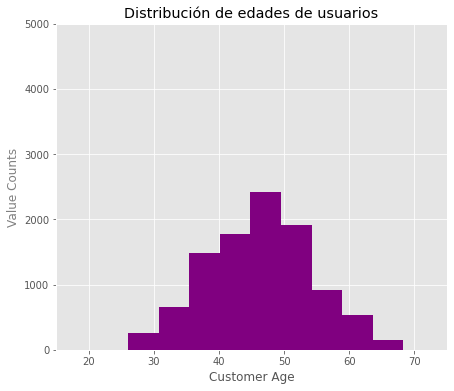

In [ ]:
plt.style.use(['ggplot'])
fig, axis = plt.subplots( figsize=(7,6))
plt.hist(x=df['Customer_Age'], color='purple')
axis.set_title('Distribución de edades de usuarios')
axis.set_xlabel('Customer Age')
axis.set_ylabel('Value Counts', color='Grey')
axis.set_xlim(xmin=15, xmax=75)
axis.set_ylim(ymin=0, ymax=5000)
plt.show()


###Grafiquemos la distribución de genero de los clientes

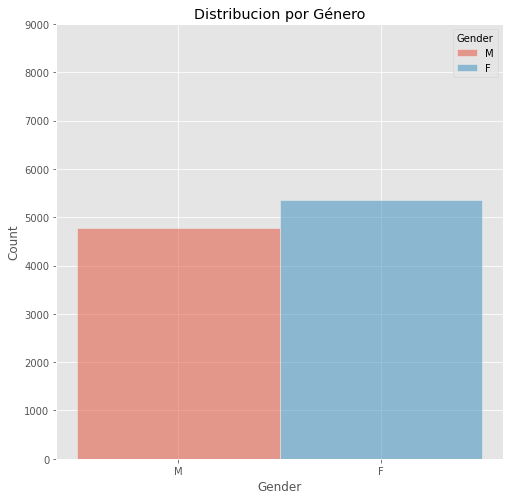

In [ ]:
mpl.style.use('ggplot')
fig, ax=plt.subplots(figsize=(8,8))
sns.histplot(data=df, x='Gender', hue='Gender')
ax.set(title=('Distribucion por Género'))
ax.set(ylim=(0,9000 ))
plt.show()

###Visualicemos los distintos niveles de estudio de clientes

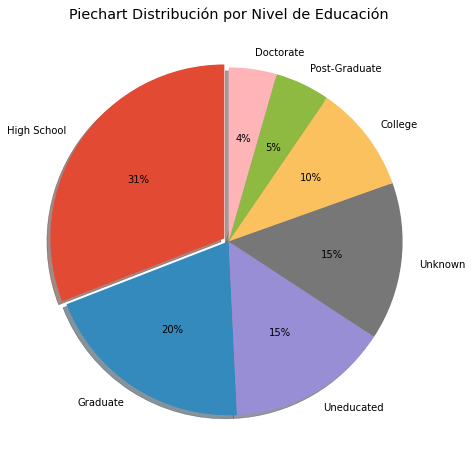

In [ ]:
mpl.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Piechart Distribución por Nivel de Educación')
g = df.Education_Level.value_counts()
slice = [g]
labels= df.Education_Level.unique()
plt.pie(slice, labels=labels, shadow=True, explode=(0.03,0,0,0,0,0,0), startangle=90, autopct='%1.0f%%') #autopc para representar porcentajes
plt.show()


###Usuarios por tarjeta, ¿Qué categoría de tarjeta es más común que tengan?

(0.0, 1000.0)

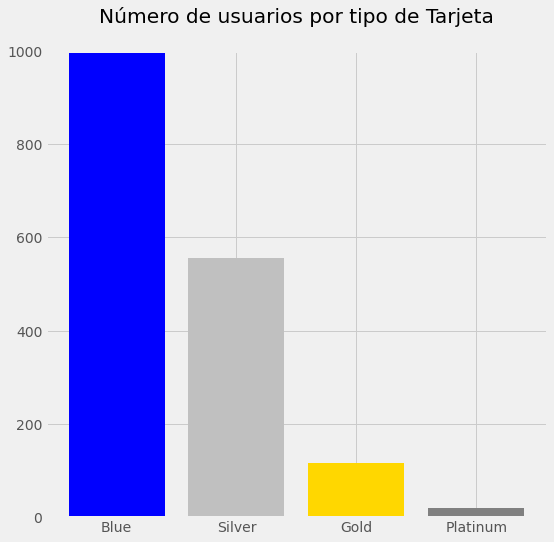

In [ ]:
mpl.style.use('fivethirtyeight')

cat=df.Card_Category.value_counts()
c= ['Blue', 'Silver', 'Gold', 'Grey']
fig, ax= plt.subplots(figsize=(8,8))
plt.bar(x=cat.index, height=cat.values, color=c )
ax.set_title('Número de usuarios por tipo de Tarjeta\n')
ax.set_ylim(0,1000)

Observamos en este gráfico de barras que la tarjeta más exclusiva entre los usuarios es la platino, mientras que la azul la más común entre estos. Sería interesante observar si una tarjeta de mayor nivel realmente tiene más beneficios.


##Ahora que conocemos un poco mejor a los clientes, podemos plantear diferentes hipótesis que nos llevarán a conocer de forma útil si nuestras predicciones son ciertas o falsas.

1.- La cancelación de tarjetas está definida por el Ingreso Mínimo, Edad y Límite de Crédito del usuario

2.- La categoría de la tarjeta es asignada por el Ingreso Mínimo

3.-A mayor nivel de categoría de tarjeta mayor saldo revolvente y mayor límite de crédito

4.-Los individuos casados tienen un mayor importe total de transacciones 


###1.- La cancelación de tarjetas está definida por el Ingreso Mínimo, Edad y Límite de Crédito del usuario

In [ ]:
label_encoder = preprocessing.LabelEncoder()
  

df['Attrition_Flag']= label_encoder.fit_transform(df['Attrition_Flag'])
  
df['Attrition_Flag'].unique() 


array([1, 0])

Tranformamos nuestra variable categórica 'Attrition_Flag' a una numérica, para representarla como:

*  **0 es una cuenta activa**
*  **1 es una cuenta cancelada**





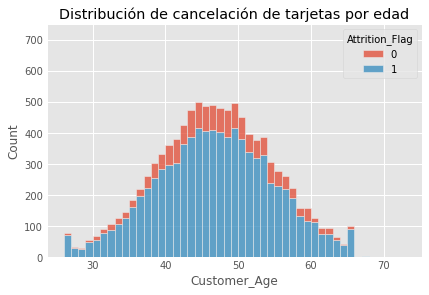

In [ ]:
mpl.style.use('ggplot')
ax=sns.histplot(data=df, x='Customer_Age', hue='Attrition_Flag', multiple='stack')
ax.set_title('Distribución de cancelación de tarjetas por edad')
ax.set_ylim(0,750)
plt.show()




Como podemos observar existe una mayor cantidad de personas de mediana edad que cancelan sus cuentas con el banco. Se tiene una distribucón normal en este caso sí se tiene una relación con la edad la cancelación de tarjetas.





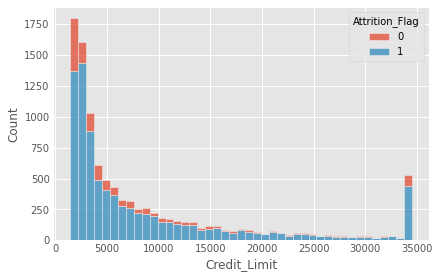

In [ ]:
sns.histplot(data=df, x='Credit_Limit', hue='Attrition_Flag', multiple='stack')


En esta gráfica se visualiza que los usuarios que se les otorga un límite de crédito menor a los demás son más suceptibles a cancelar su tarjeta, así como también los que cuentan con un el límite de crédito máximo otorgado por este banco que es de 35,000

###2.- La categoría de la tarjeta es asignada por el Ingreso Mínimo


Text(0.5, 1.0, 'Ingreso minimo según tipo de tarjeta\n')

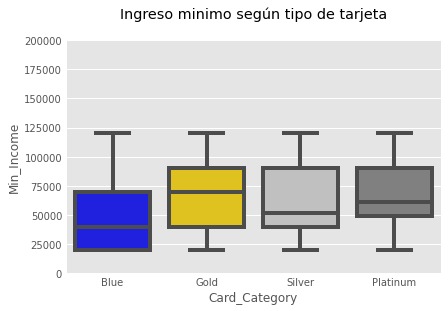

In [ ]:

mpl.style.use('ggplot')
ax=sns.boxplot(x='Card_Category', y='Min_Income', data=df, palette=['blue', 'gold', 'silver', 'grey'])
ax.set(ylim=(0, 200000))
ax.set_title('Ingreso minimo según tipo de tarjeta\n')


Como nuestra hipótesis lo estableció, si existe una relación directa entre el salario mínimo y la categoría de tarjeta, este gráfico nos representa que los usuarios de tarjeta azul tienen una media de ingreso menor con respecto a demás tarjetas por eso la hace más accesible a los usuarios en general.

###3.-A mayor nivel de categoría de tarjeta mayor saldo revolvente y mayor límite de crédito





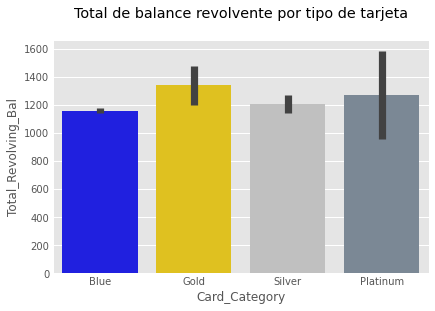

In [ ]:
#Ahora descubramos si es conveniente ser usuario de tarjetas más exclusivas por el balance revolvente de compras

ax=sns.barplot(x='Card_Category', y='Total_Revolving_Bal', data=df, palette=['blue', 'gold', 'silver', 'lightslategrey'])
ax.set_title('Total de balance revolvente por tipo de tarjeta\n')
plt.show()

Observemos en la gráfica que las tarjetas más exclusivas gozan de un balance revolvente total mayor, la hipótesis de cumple.

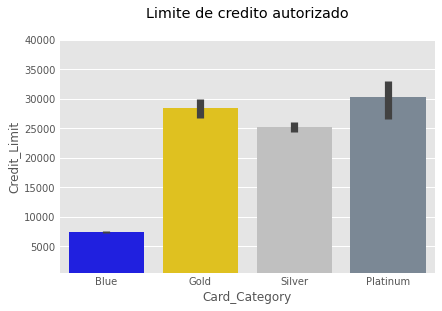

In [ ]:

ax=sns.barplot(x='Card_Category', y='Credit_Limit', data=df, palette=['blue', 'gold', 'silver', 'lightslategrey'])
ax.set_title('Limite de credito autorizado\n')
ax.set(ylim=(400, 40000))

plt.show()

Nuestra hipótesis se cumple, los usuarios con una categoria mayor de tarjeta cuentan con un beneficio de mayor límite de crédito.

###4.-Los individuos casados tienen un mayor importe total de transacciones 


In [ ]:
ax=sns.histplot(data=df, x="Total_Trans_Amt", hue="Marital_Status", multiple='stack')
ax.set_ylim(0,50)

Observemos en la gráfica, los individuos de estado civil que están casados realmente tienen un mayor nivel de importe de transacciones. La hipótesis es válida y además se les podrían ofrecer como recomendación al banco un nivel de crédito mayor para que así crezca este aún más.

# Selección de variables más importantes: reduciendo la dimensionalidad de nuestro dataset

Comencemos copiando nuestro dataset original, utilicemos uno nuevo para transformarlo todas nuestras variables categóricas en numericas para porteriormente poderlas utilizar para Feature Selection y además aplicar algoritmos de Machine Learning

In [ ]:
data = df.drop(['CLIENTNUM'], axis=1)


In [ ]:
# Aquí espeficicamos que tpdas nuestras variables no numéricas esten especificadas como categóricas para poder usar .cat.codes
data = data.astype({'Attrition_Flag':'category','Gender':'category','Education_Level':'category','Marital_Status':'category',
                'Income_Category':'category','Card_Category':'category'})

In [ ]:
# Transformamos a numéricas las variables categoricas nominales 
data['Attrition_Flag'] = data['Attrition_Flag'].cat.codes
data['Gender'] = data['Gender'].cat.codes
data['Marital_Status'] = data['Marital_Status'].cat.codes

# Transformamos a numéricas las variables categoricas ordinales 
data['Education_Level'] = data['Education_Level'].cat.set_categories(['Uneducated','High School','College','Graduate','Post-Graduate','Doctorate'],
                                                                 ordered=True).cat.codes
data['Income_Category'] = data['Income_Category'].cat.set_categories(['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'],
                                                                 ordered=True).cat.codes
data['Card_Category'] = data['Card_Category'].cat.set_categories(['Blue','Silver','Gold','Platinum'],
                                                             ordered=True).cat.codes

In [ ]:
data.head(10)

In [ ]:
data.describe().T

In [ ]:
data.shape

Ahora que ya hemos tranformado nuestras variables a numéricas, podemos analizar las correlación entre estas donde podremos destacar como interaccionan entre sí y si tienen conexiones relevantes unas con otras para posteriormente realizar nuestro **Feature Selection**

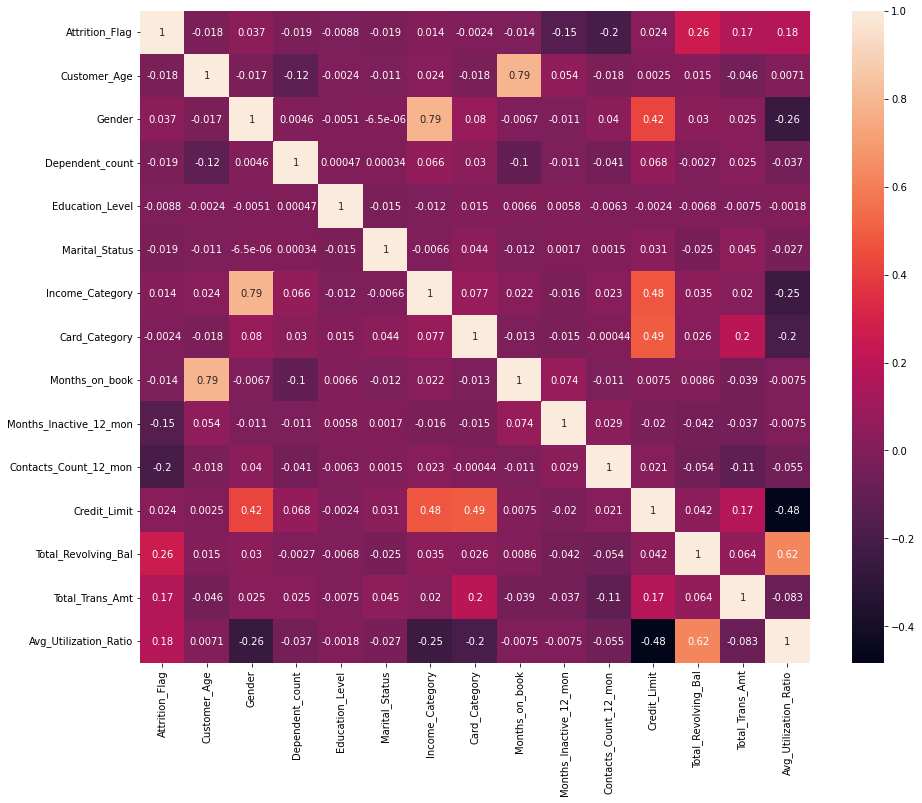

In [ ]:
fig = plt.figure(figsize=(15,12))
cor = data.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [ ]:
X = data.drop('Attrition_Flag', axis=1) #Seleccionamos la variable a predecir --> Attrition Flag
y = data['Attrition_Flag']

from sklearn.model_selection import train_test_split #(Se divide el set entre entrenamiento y prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) #Split de entrenamiento - prueba (70 - 30)

In [ ]:
X_train.shape, X_test.shape

((7088, 14), (3039, 14))

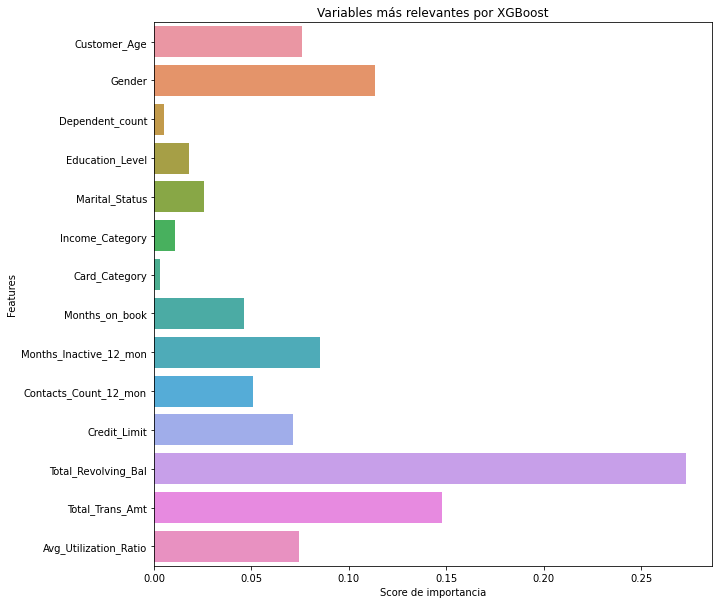

In [ ]:
plt.figure(figsize=(10, 10))
import xgboost
from xgboost import XGBClassifier
xgboost =XGBClassifier()
xgboost.fit(X_train,y_train)
feature_imp = xgboost.feature_importances_
sns.barplot(x=feature_imp, y=X.columns)
plt.xlabel('Score de importancia')
plt.ylabel('Features')
plt.title("Variables más relevantes por XGBoost")
plt.show()

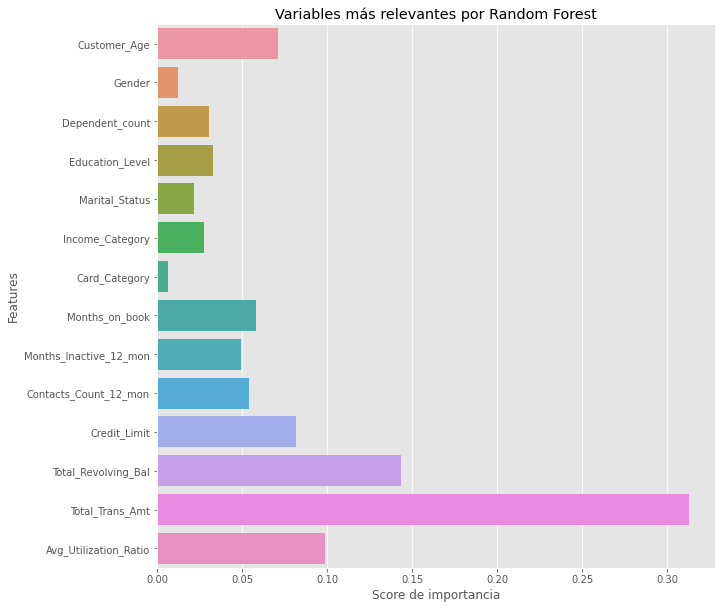

In [ ]:
plt.figure(figsize=(10, 10))
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(X_train,y_train)
feature_imp2 = rf.feature_importances_
sns.barplot(x=feature_imp2, y=X.columns)
plt.xlabel('Score de importancia')
plt.ylabel('Features')
plt.title("Variables más relevantes por Random Forest")
plt.show()

Como podemos observar en nuestro dataset, las variables más relevantes que interactuan para saber si el cliente cancelará su cuenta o no son: **Total_Trans_Amt y Total_Revolving_Balance**
Estas fueron analizadas a través de XGBoost Classifier y RandomForestClassifier

# Aplicando modelos de ML y sus metricas

In [ ]:
from imblearn.over_sampling import SMOTE #Lo ocuparemos para balancear datos
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)


X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 0)


## Modelo de regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression
Modelo1 = LogisticRegression()
Modelo1.fit(X_train, y_train)
y_pred = Modelo1.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score 

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mse = mean_squared_error (y_test, y_pred)

print (cm, ': Matriz de conf')
print('\nAccuracy', ac)



[[  99  357]
 [  73 2510]] : Matriz de conf

Accuracy 0.8585060875287923


## Modelo de Arbol de decision

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Modelo2 = DecisionTreeClassifier()
Modelo2.fit(X_train, y_train)

y_pred = Modelo2.predict(X_test)

#Metrica de evaluacion

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mse = mean_squared_error (y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print (cm, ': Matriz de conf')
print('\nAccuracy', ac)



[[ 310  146]
 [ 133 2450]] : Matriz de conf

Accuracy 0.9081934846989141


In [ ]:
from sklearn.ensemble import RandomForestClassifier
Modelo3 = RandomForestClassifier()
Modelo3.fit(X_train, y_train)

y_pred = Modelo3.predict(X_test)

#Metrica de evaluacion

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mse = mean_squared_error (y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print (cm, ': Matriz de conf')
print('\nAccuracy', ac)

[[ 296  160]
 [  53 2530]] : Matriz de conf

Accuracy 0.9299111549851925


## Modelo de clasificación XGBOOST

In [ ]:
from xgboost import XGBClassifier
xgboost =XGBClassifier(use_label_encoder = False)
xgboost.fit(X_train,y_train)

y_pred = xgboost.predict(X_test)

#Metrica de evaluacion

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mse = mean_squared_error (y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print (cm, ': Matriz de conf')
print('\nAccuracy', ac)


[[ 303  153]
 [  61 2522]] : Matriz de conf

Accuracy 0.9295820993747943


#Evaluando Modelos de ML

Como podemos observar, se utilizaron tres modelos distintos de ML para predecir si los clientes cancelarán su cuenta o no, esto resulta útil para que así el banco pueda ofrecerles mejores prestaciones a través de una tarjeta de crédito a sus clientes y así no las cancelen.

Al finalizarlos y evaluarlos, podemos destacar scores distintos para cada uno, sin embargo destacan los modelos de Random Forest y el XGBoost ambos para clasificar, más adelante se hablará de la mejora de estos debido a su perfomance de este desaafío.

